In [1]:
import pandas
import seaborn
import sklearn.preprocessing

%matplotlib inline

In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Instructions

- Read both training and test data from CSV files
- Then, identify which columns are numerical and which columns are categorical
- Assess whether the data is balance or imbalance

In [3]:
data_train = pandas.read_csv("./data/train_data.csv").set_index("id")
data_train.head(2)

,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country,label
id,,,,,,,,,,,,,,,,,,
2103,522215230.0,9013.0,2.0,self-emp-not-inc,335549.0,prof-school,15.0,never-married,prof-specialty,not-in-family,white,male,0.0,4.0,2.0,USA,united-states,1.0
14649,318423385.0,9914.0,0.0,private,98287.0,hs-grad,9.0,married-civ-spouse,sales,husband,white,male,0.0,0.0,3.0,USA,united-states,0.0


In [4]:
data_train=data_train.drop(['social-security-number','house-number','fnlwgt','native-country-code'], axis='columns')
data_train.head(2)

,age-group,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,label
id,,,,,,,,,,,,,,
2103,2.0,self-emp-not-inc,prof-school,15.0,never-married,prof-specialty,not-in-family,white,male,0.0,4.0,2.0,united-states,1.0
14649,0.0,private,hs-grad,9.0,married-civ-spouse,sales,husband,white,male,0.0,0.0,3.0,united-states,0.0


In [5]:
data_test = pandas.read_csv("./data/test_data.csv").set_index("id")
data_test.head(2)

,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country,label
id,,,,,,,,,,,,,,,,,,
12849,150854577.0,249.0,1.0,private,509500.0,bachelors,13.0,never-married,tech-support,not-in-family,white,female,2.0,0.0,2.0,USA,united-states,1.0
1460,437726609.0,1112.0,0.0,private,243368.0,preschool,1.0,never-married,farming-fishing,not-in-family,white,male,0.0,0.0,3.0,MEX,mexico,0.0


In [6]:
data_test=data_test.drop(['social-security-number','house-number','fnlwgt','native-country-code'], axis='columns')
data_test.head(2)

,age-group,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,label
id,,,,,,,,,,,,,,
12849,1.0,private,bachelors,13.0,never-married,tech-support,not-in-family,white,female,2.0,0.0,2.0,united-states,1.0
1460,0.0,private,preschool,1.0,never-married,farming-fishing,not-in-family,white,male,0.0,0.0,3.0,mexico,0.0


In [7]:
data_train.dtypes

age-group         float64
workclass          object
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capitalgain       float64
capitalloss       float64
hoursperweek      float64
native-country     object
label             float64
dtype: object

In [8]:
categorical_features = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
]

for n in categorical_features:
    print(data_train[n].unique())

['self-emp-not-inc' 'private' nan 'self-emp-inc' 'local-gov' 'federal-gov'
 'state-gov' 'never-worked' 'without-pay']
['prof-school' 'hs-grad' 'some-college' '1st-4th' 'masters' 'bachelors'
 '11th' 'assoc-acdm' 'assoc-voc' 'doctorate' '7th-8th' '10th' '9th'
 '5th-6th' '12th' nan 'preschool']
['never-married' 'married-civ-spouse' 'separated' 'divorced'
 'married-af-spouse' 'widowed' 'married-spouse-absent' nan]
['prof-specialty' 'sales' 'exec-managerial' 'craft-repair'
 'machine-op-inspct' nan 'other-service' 'handlers-cleaners'
 'tech-support' 'transport-moving' 'farming-fishing' 'priv-house-serv'
 'adm-clerical' 'protective-serv' 'armed-forces']
['not-in-family' 'husband' 'other-relative' 'wife' 'own-child' 'unmarried'
 nan]
['white' 'amer-indian-eskimo' 'black' 'asian-pac-islander' 'other' nan]
['male' 'female' nan]
['united-states' 'mexico' 'england' 'italy' 'el-salvador' nan 'canada'
 'germany' 'jamaica' 'ecuador' 'japan' 'dominican-republic' 'ireland'
 'philippines' 'cuba' 'vietna

In [9]:
numerical_features = [
    'age-group',
    'education-num',
    'capitalgain',
    'capitalloss',
    'hoursperweek',
]

for n in numerical_features:
    print(data_train[n].unique())

[ 2.  0.  3.  4.  1. nan]
[15.  9. 10.  2. 14. 13.  7. 12. 11. 16.  4.  6.  5.  3.  8.  1. nan]
[ 0.  4.  2.  3.  1. nan]
[ 4.  0.  3.  2.  1. nan]
[ 2.  3.  4.  0.  1. nan]


In [10]:
data_train['label'].value_counts()

label
0.0    9102
1.0    6573
Name: count, dtype: int64

In [11]:
data_test['label'].value_counts()

label
0.0    3033
1.0    2192
Name: count, dtype: int64

# Instructions
- Use appropriate plots to visualize all the features in the training data based on class conditional perspective
  - Hint: use  `seaborn.countplot`, `seaborn.histplot`
- Study the features from the visualizations created

<Axes: xlabel='count', ylabel='label'>

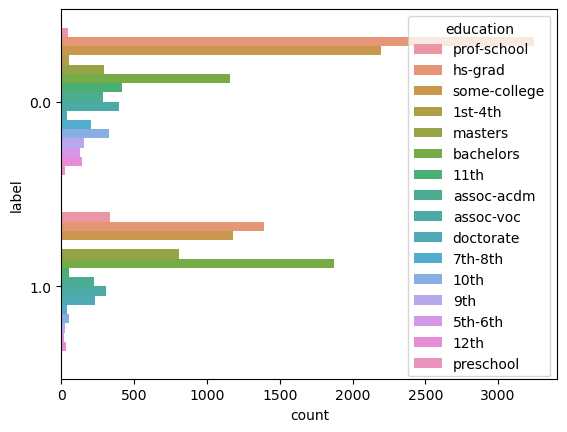

In [12]:
seaborn.countplot(data=data_train, y='label', hue='education')

<Axes: xlabel='count', ylabel='label'>

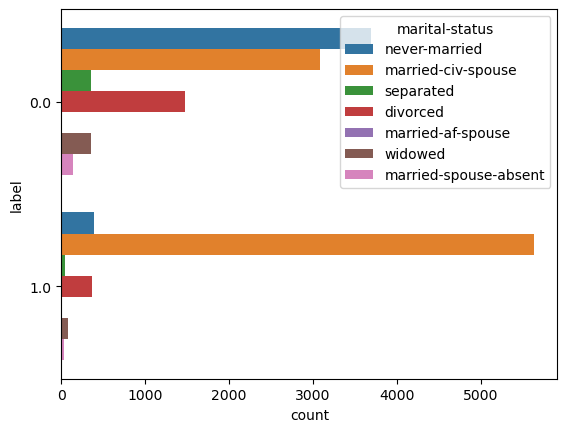

In [13]:
seaborn.countplot(data=data_train, y='label', hue='marital-status')

<Axes: xlabel='count', ylabel='label'>

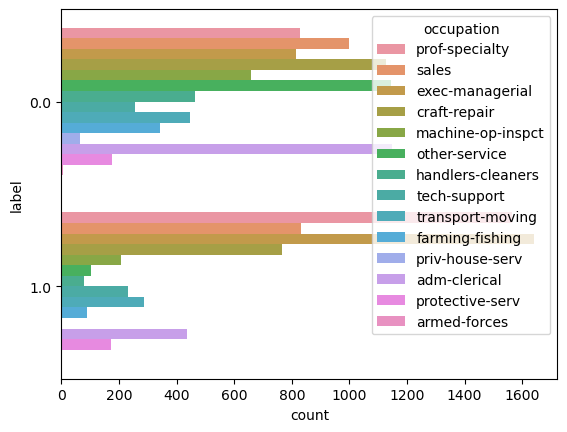

In [14]:
seaborn.countplot(data=data_train, y='label', hue='occupation')

<Axes: xlabel='count', ylabel='label'>

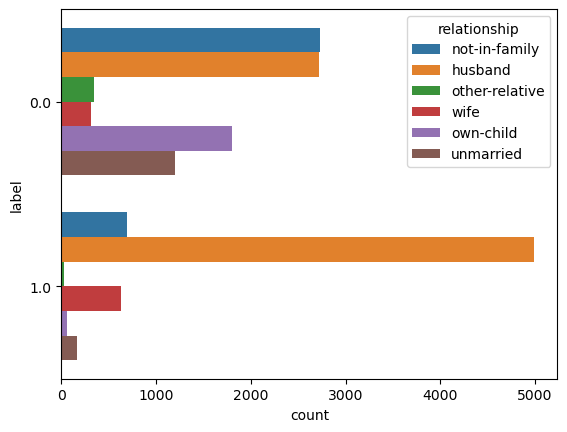

In [15]:
seaborn.countplot(data=data_train, y='label', hue='relationship')

<Axes: xlabel='count', ylabel='label'>

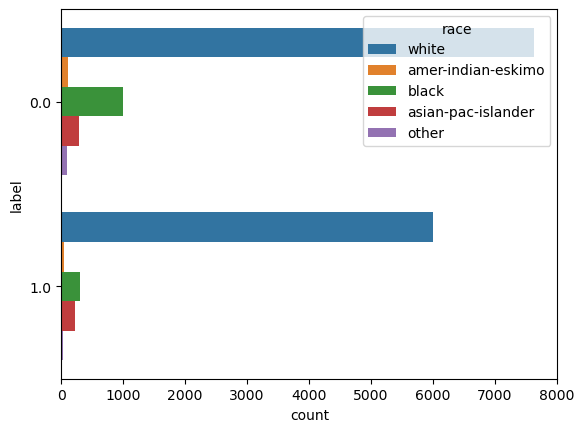

In [16]:
seaborn.countplot(data=data_train, y='label', hue='race')

<Axes: xlabel='count', ylabel='label'>

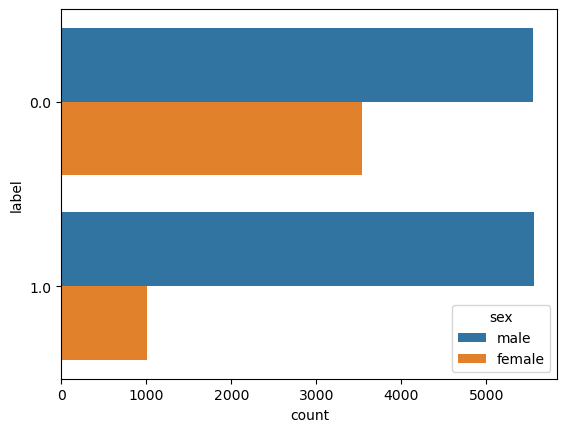

In [17]:
seaborn.countplot(data=data_train, y='label', hue='sex')

<Axes: xlabel='age-group', ylabel='Count'>

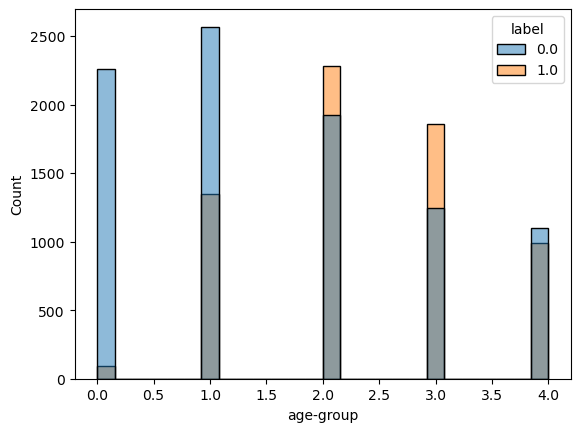

In [18]:
seaborn.histplot(data=data_train,x='age-group',hue='label')

<Axes: xlabel='education-num', ylabel='Count'>

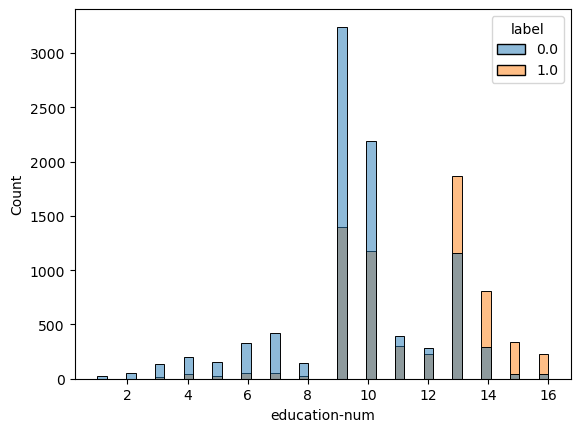

In [19]:
seaborn.histplot(data=data_train,x='education-num',hue='label')

<Axes: xlabel='capitalgain', ylabel='Count'>

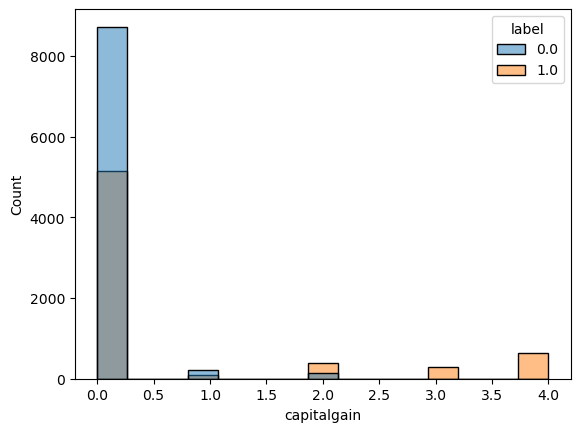

In [20]:
seaborn.histplot(data=data_train,x='capitalgain',hue='label')

<Axes: xlabel='capitalloss', ylabel='Count'>

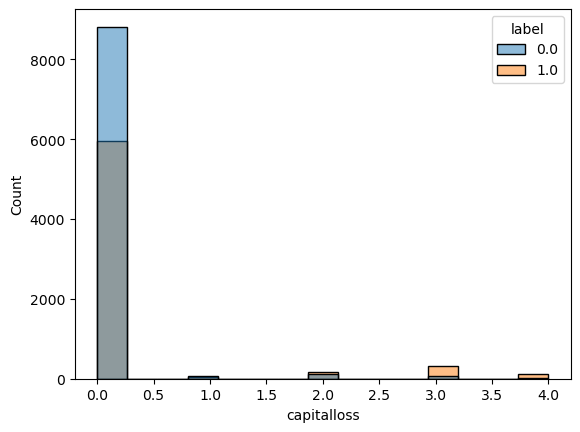

In [21]:
seaborn.histplot(data=data_train,x='capitalloss',hue='label')

<Axes: xlabel='hoursperweek', ylabel='Count'>

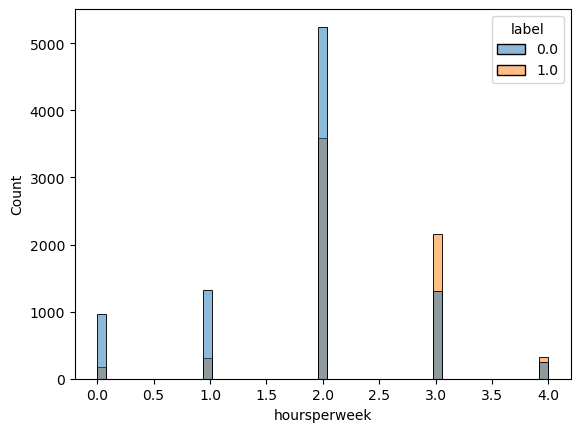

In [22]:
seaborn.histplot(data=data_train,x='hoursperweek',hue='label')

# Instructions
- Investigate whether the dataset contains any missing data

In [23]:
data_train.isna().sum()

age-group           6
workclass         792
education          15
education-num      12
marital-status     20
occupation        791
relationship       14
race               13
sex                14
capitalgain        17
capitalloss        14
hoursperweek       18
native-country    302
label               0
dtype: int64

In [24]:
data_test.isna().sum()

age-group           7
workclass         265
education           5
education-num       2
marital-status      3
occupation        263
relationship        7
race                9
sex                 8
capitalgain         6
capitalloss         7
hoursperweek        3
native-country     96
label               0
dtype: int64

# Instructions
- Use `.dropna()` to discard all missing data from datasets
- Investigate whether there are still any missing data in datasets after using the `.dropna()`

In [25]:
data_train = data_train.dropna()

In [26]:
data_train.isna().sum()

age-group         0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capitalgain       0
capitalloss       0
hoursperweek      0
native-country    0
label             0
dtype: int64

In [27]:
data_train.shape

(14453, 14)

In [28]:
data_test = data_test.dropna()

In [29]:
data_test.isna().sum()

age-group         0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capitalgain       0
capitalloss       0
hoursperweek      0
native-country    0
label             0
dtype: int64

In [30]:
data_test.shape

(4810, 14)

## For numerical features
- Define and select a subset of numerical features for training and test data
- Use `sklearn.preprocessing.StandardScaler` to create a standard scaler, then fit using the training data
- Create a new `pandas.DataFrame` of only numerically encoded features for both training and test data

In [31]:
# data_train_numerical_features = data_train[numerical_features]

In [32]:
# data_test_numerical_features = data_test[numerical_features]

In [33]:
# standard_scaler = sklearn.preprocessing.StandardScaler()
# standard_scaler

In [34]:
# standard_scaler.fit(data_train_numerical_features)

In [35]:
# data_train_numerical_features = pandas.DataFrame(
#     data = standard_scaler.transform(data_train_numerical_features),
#     columns = standard_scaler.get_feature_names_out(),
#     index = data_train_numerical_features.index
#     )
# data_train_numerical_features

In [36]:
# data_test_numerical_features = pandas.DataFrame(
#     data = standard_scaler.transform(data_test_numerical_features),
#     columns = standard_scaler.get_feature_names_out(),
#     index = data_test_numerical_features.index
#     )
# data_test_numerical_features

In [37]:
ordinal_features = [
    'education',
    'age-group',
    'education-num',
    'capitalgain',
    'capitalloss',
    'hoursperweek',
]

# Instructions
- Use `.join` to reconstruct the processed training and test data

In [38]:
ordinal_mapping = [
    ['preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th',
     'hs-grad','some-college','assoc-voc','assoc-acdm','bachelors','masters',
     'prof-school','doctorate'],
    [0, 1, 2, 3, 4,],
    [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0],
    [0, 1, 2, 3, 4,],
    [0, 1, 2, 3, 4,],
    [0, 1, 2, 3, 4,],
]

In [39]:
ordinal_encoder = sklearn.preprocessing.OrdinalEncoder(
    categories = ordinal_mapping
)

In [40]:
ordinal_encoder.fit(data_train[ordinal_features])

OrdinalEncoder(categories=[['preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
                            '10th', '11th', '12th', 'hs-grad', 'some-college',
                            'assoc-voc', 'assoc-acdm', 'bachelors', 'masters',
                            'prof-school', 'doctorate'],
                           [0, 1, 2, 3, 4],
                           [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                            11.0, 12.0, 13.0, 14.0, 15.0, 16.0],
                           [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4]])

In [41]:
data_train_ordinal_features = pandas.DataFrame(
    data = ordinal_encoder.transform(data_train[ordinal_features]),
    columns = ordinal_encoder.get_feature_names_out(),
    index=data_train.index
)
data_train_ordinal_features

,education,age-group,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,
2103,14.0,2.0,14.0,0.0,4.0,2.0
14649,8.0,0.0,8.0,0.0,0.0,3.0
7379,8.0,2.0,8.0,0.0,0.0,4.0
24479,9.0,2.0,9.0,0.0,0.0,3.0
19532,1.0,3.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...
8695,9.0,0.0,9.0,0.0,0.0,2.0
2192,9.0,2.0,9.0,2.0,0.0,2.0
8250,8.0,0.0,8.0,0.0,0.0,2.0


In [42]:
data_test_ordinal_features = pandas.DataFrame(
    data = ordinal_encoder.transform(data_test[ordinal_features]),
    columns = ordinal_encoder.get_feature_names_out(),
    index=data_test.index
)
data_test_ordinal_features

,education,age-group,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,
12849,12.0,1.0,12.0,2.0,0.0,2.0
1460,0.0,0.0,0.0,0.0,0.0,3.0
13594,8.0,2.0,8.0,0.0,0.0,2.0
14333,8.0,2.0,8.0,0.0,0.0,3.0
10595,12.0,2.0,12.0,0.0,0.0,4.0
...,...,...,...,...,...,...
16929,8.0,0.0,8.0,0.0,0.0,2.0
981,11.0,1.0,11.0,0.0,0.0,3.0
2952,11.0,2.0,11.0,0.0,0.0,2.0


## For nominal features
- Define a subset of nominal features
- Define a list of nominal maps which sort the feature values in appropriate orders
- Use `sklearn.preprocessing.OneHotEncoder` to create an nominal encoder, then fit using the training data
- Create a new `pandas.DataFrame` of only nominally encoded features for both training and test data

In [43]:
nominal_features = [
    'workclass',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
]
for n in nominal_features:
    print(data_train[n].unique())

['self-emp-not-inc' 'private' 'self-emp-inc' 'local-gov' 'federal-gov'
 'state-gov' 'without-pay']
['never-married' 'married-civ-spouse' 'separated' 'divorced'
 'married-af-spouse' 'married-spouse-absent' 'widowed']
['prof-specialty' 'sales' 'exec-managerial' 'craft-repair'
 'machine-op-inspct' 'other-service' 'handlers-cleaners' 'tech-support'
 'transport-moving' 'farming-fishing' 'priv-house-serv' 'adm-clerical'
 'protective-serv' 'armed-forces']
['not-in-family' 'husband' 'other-relative' 'wife' 'own-child' 'unmarried']
['white' 'amer-indian-eskimo' 'black' 'asian-pac-islander' 'other']
['male' 'female']
['united-states' 'mexico' 'italy' 'el-salvador' 'canada' 'germany'
 'jamaica' 'ecuador' 'japan' 'dominican-republic' 'ireland' 'philippines'
 'england' 'cuba' 'vietnam' 'guatemala' 'taiwan' 'hungary' 'france' 'hong'
 'cambodia' 'iran' 'china' 'columbia' 'yugoslavia' 'poland' 'greece'
 'trinadad&tobago' 'india' 'nicaragua' 'south' 'portugal' 'puerto-rico'
 'outlying-us(guam-usvi-etc)

In [44]:
nominal_mapping = [
    ['self-emp-not-inc', 'private', 'self-emp-inc', 'local-gov', 'federal-gov', 'state-gov', 'without-pay'],
    ['never-married', 'married-civ-spouse', 'separated', 'divorced', 'married-af-spouse', 'married-spouse-absent', 'widowed'],
    ['prof-specialty', 'sales', 'exec-managerial', 'craft-repair', 'machine-op-inspct', 'other-service', 'handlers-cleaners', 'tech-support', 'transport-moving', 'farming-fishing', 'priv-house-serv', 'adm-clerical', 'protective-serv', 'armed-forces'],
    ['not-in-family', 'husband', 'other-relative', 'wife', 'own-child', 'unmarried'],
    ['white', 'amer-indian-eskimo', 'black', 'asian-pac-islander', 'other'],
    ['male', 'female'],
    ['united-states', 'mexico', 'italy', 'el-salvador', 'canada', 'germany', 'jamaica', 'ecuador', 'japan', 'dominican-republic', 'ireland', 'philippines', 'england', 'cuba', 'vietnam', 'guatemala', 'taiwan', 'hungary', 'france', 'hong', 'cambodia', 'iran', 'china', 'columbia', 'yugoslavia', 'poland', 'greece', 'trinadad&tobago', 'india', 'nicaragua', 'south', 'portugal', 'puerto-rico', 'outlying-us(guam-usvi-etc)', 'thailand', 'laos', 'peru', 'holand-netherlands', 'haiti', 'scotland', 'honduras']
]


In [45]:
onehot_encoder = sklearn.preprocessing.OneHotEncoder(
    categories = nominal_mapping,
    sparse_output = False
)
onehot_encoder

OneHotEncoder(categories=[['self-emp-not-inc', 'private', 'self-emp-inc',
                           'local-gov', 'federal-gov', 'state-gov',
                           'without-pay'],
                          ['never-married', 'married-civ-spouse', 'separated',
                           'divorced', 'married-af-spouse',
                           'married-spouse-absent', 'widowed'],
                          ['prof-specialty', 'sales', 'exec-managerial',
                           'craft-repair', 'machine-op-inspct', 'other-service',
                           'handlers-clean...
                          ['male', 'female'],
                          ['united-states', 'mexico', 'italy', 'el-salvador',
                           'canada', 'germany', 'jamaica', 'ecuador', 'japan',
                           'dominican-republic', 'ireland', 'philippines',
                           'england', 'cuba', 'vietnam', 'guatemala', 'taiwan',
                           'hungary', 'france', 'hong', 'cambodia', 'iran',
                           'china', 'columbia', 'yugoslavia', 'poland',
                           'greece', 'trinadad&tobago', 'india', 'nicaragua', ...]],
              sparse_output=False)

In [46]:
onehot_encoder.fit(data_train[nominal_features])

OneHotEncoder(categories=[['self-emp-not-inc', 'private', 'self-emp-inc',
                           'local-gov', 'federal-gov', 'state-gov',
                           'without-pay'],
                          ['never-married', 'married-civ-spouse', 'separated',
                           'divorced', 'married-af-spouse',
                           'married-spouse-absent', 'widowed'],
                          ['prof-specialty', 'sales', 'exec-managerial',
                           'craft-repair', 'machine-op-inspct', 'other-service',
                           'handlers-clean...
                          ['male', 'female'],
                          ['united-states', 'mexico', 'italy', 'el-salvador',
                           'canada', 'germany', 'jamaica', 'ecuador', 'japan',
                           'dominican-republic', 'ireland', 'philippines',
                           'england', 'cuba', 'vietnam', 'guatemala', 'taiwan',
                           'hungary', 'france', 'hong', 'cambodia', 'iran',
                           'china', 'columbia', 'yugoslavia', 'poland',
                           'greece', 'trinadad&tobago', 'india', 'nicaragua', ...]],
              sparse_output=False)

In [47]:
onehot_encoder.get_feature_names_out()

array(['workclass_self-emp-not-inc', 'workclass_private',
       'workclass_self-emp-inc', 'workclass_local-gov',
       'workclass_federal-gov', 'workclass_state-gov',
       'workclass_without-pay', 'marital-status_never-married',
       'marital-status_married-civ-spouse', 'marital-status_separated',
       'marital-status_divorced', 'marital-status_married-af-spouse',
       'marital-status_married-spouse-absent', 'marital-status_widowed',
       'occupation_prof-specialty', 'occupation_sales',
       'occupation_exec-managerial', 'occupation_craft-repair',
       'occupation_machine-op-inspct', 'occupation_other-service',
       'occupation_handlers-cleaners', 'occupation_tech-support',
       'occupation_transport-moving', 'occupation_farming-fishing',
       'occupation_priv-house-serv', 'occupation_adm-clerical',
       'occupation_protective-serv', 'occupation_armed-forces',
       'relationship_not-in-family', 'relationship_husband',
       'relationship_other-relative', 'rel

In [48]:
onehot_encoder.get_feature_names_out().shape

(82,)

In [49]:
data_train_nominal_features = pandas.DataFrame(
    data = onehot_encoder.transform(data_train[nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index=data_train.index
)
data_train_nominal_features

,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,workclass_federal-gov,workclass_state-gov,workclass_without-pay,marital-status_never-married,marital-status_married-civ-spouse,marital-status_separated,...,native-country_portugal,native-country_puerto-rico,native-country_outlying-us(guam-usvi-etc),native-country_thailand,native-country_laos,native-country_peru,native-country_holand-netherlands,native-country_haiti,native-country_scotland,native-country_honduras
id,,,,,,,,,,,,,,,,,,,,,
2103,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14649,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7379,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24479,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19532,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2192,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
data_test_nominal_features = pandas.DataFrame(
    data = onehot_encoder.transform(data_test[nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index=data_test.index
)
data_test_nominal_features

,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,workclass_federal-gov,workclass_state-gov,workclass_without-pay,marital-status_never-married,marital-status_married-civ-spouse,marital-status_separated,...,native-country_portugal,native-country_puerto-rico,native-country_outlying-us(guam-usvi-etc),native-country_thailand,native-country_laos,native-country_peru,native-country_holand-netherlands,native-country_haiti,native-country_scotland,native-country_honduras
id,,,,,,,,,,,,,,,,,,,,,
12849,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13594,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10595,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16929,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
981,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2952,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
data_train = (
    data_train_ordinal_features
    .join(data_train_nominal_features)
    .join(data_train['label'])
)
data_train

,education,age-group,education-num,capitalgain,capitalloss,hoursperweek,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,...,native-country_puerto-rico,native-country_outlying-us(guam-usvi-etc),native-country_thailand,native-country_laos,native-country_peru,native-country_holand-netherlands,native-country_haiti,native-country_scotland,native-country_honduras,label
id,,,,,,,,,,,,,,,,,,,,,
2103,14.0,2.0,14.0,0.0,4.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14649,8.0,0.0,8.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7379,8.0,2.0,8.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24479,9.0,2.0,9.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19532,1.0,3.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,9.0,0.0,9.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2192,9.0,2.0,9.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8250,8.0,0.0,8.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
data_test = (
    data_test_ordinal_features
    .join(data_test_nominal_features)
    .join(data_test['label'])
)
data_test

,education,age-group,education-num,capitalgain,capitalloss,hoursperweek,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,...,native-country_puerto-rico,native-country_outlying-us(guam-usvi-etc),native-country_thailand,native-country_laos,native-country_peru,native-country_holand-netherlands,native-country_haiti,native-country_scotland,native-country_honduras,label
id,,,,,,,,,,,,,,,,,,,,,
12849,12.0,1.0,12.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1460,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13594,8.0,2.0,8.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14333,8.0,2.0,8.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10595,12.0,2.0,12.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16929,8.0,0.0,8.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
981,11.0,1.0,11.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2952,11.0,2.0,11.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Instructions
- Write the train data set to `./data/features.train.csv`
- Write the train data set to `./data/features.test.csv`

In [53]:
data_train.to_csv('./data/features.train.csv')

In [54]:
data_test.to_csv('./data/features.test.csv')